# JL - DMBA - PPP Project - Draft 2
- with transformed dataset

## Import Libraries

In [98]:
import numpy as np
import pandas as pd

import random
import os 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")

# openpyxl: nstall this to open Excel files 
# !pip install openpyxl
import openpyxl

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import statistics as stat
from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter


## Import Files

In [41]:
#read csv files
ppp_transformed_df = pd.read_csv('ppp_transformed.csv')
#ppp_data_dict_df = pd.read_csv('archive/ppp_data_dict.csv')
#ppp_over_150k_df = pd.read_csv('archive/ppp_over_150k.csv')
#ppp_fraud_df = pd.read_csv('archive/ppp_fraud_cases.csv')

ppp_transformed_df.head()
list1=ppp_transformed_df.columns.tolist()

#### - Generating Sample of file

In [ ]:
# Generate excel of a random sample of 100 rows
random_rows = random.sample(range(len(ppp_transformed_df)), 100)
# Create a new DataFrame with the randomly selected rows
ppp_transformed_df_sample = ppp_transformed_df.iloc[random_rows]
# Convert the DataFrame to Excel
# ppp_transformed_df_sample.to_excel("ppp_transformed_df_sample.xlsx")
#print headers

In [ ]:
ppp_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961899 entries, 0 to 961898
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   LoanNumber                                  961899 non-null  int64  
 1   DateApproved                                961899 non-null  object 
 2   SBAOfficeCode                               961899 non-null  int64  
 3   ProcessingMethod                            961899 non-null  object 
 4   BorrowerName                                961892 non-null  object 
 5   BorrowerCity                                961899 non-null  object 
 6   BorrowerState                               961899 non-null  object 
 7   BorrowerZip                                 961899 non-null  object 
 8   LoanStatus                                  961899 non-null  object 
 9   Term                                        961899 non-null  int64  
 

## Correlation Matrix

### - Variables to keep by looking at correlation

-  Full list of variables in data currently

In [10]:
print(list1) 
#All columns: ['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod', 'BorrowerName', 'BorrowerCity', 'BorrowerState', 'BorrowerZip', 'LoanStatus', 'Term', 'InitialApprovalAmount', 'CurrentApprovalAmount', 
# 'FranchiseName', 'ServicingLenderName', 'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator', 'LMIIndicator', 
# 'BusinessAgeDescription', 'JobsReported', 'NAICSCode', 'Race', 'Ethnicity', 'BusinessType', 'Gender', 'Veteran', 
# 'TOTAL_PROCEED', 'PROCEED_Diff', 'UTILITIES_PROCEED_pct', 'PAYROLL_PROCEED_pct', 'MORTGAGE_INTEREST_PROCEED_pct', 'RENT_PROCEED_pct', 'REFINANCE_EIDL_PROCEED_pct', 'HEALTH_CARE_PROCEED_pct', 'DEBT_INTEREST_PROCEED_pct', 
# 'PROCEED_Per_Job', 'isAfterBiden', 'isDiffBorrowerAndProjectCity', 'Industry', 'Subsector', 'ProcessingMethod_encoded', 'LoanStatus_encoded', 'RuralUrbanIndicator_encoded', 'HubzoneIndicator_encoded', 'LMIIndicator_encoded', 'BusinessAgeDescription_encoded', 'Race_encoded', 'Ethnicity_encoded', 'BusinessType_encoded', 'Gender_encoded', 'Veteran_encoded', 'Industry_encoded', 'Term_standardised', 'JobsReported_standardised', 'PROCEED_Diff_standardised', 'UTILITIES_PROCEED_pct_standardised', 'PAYROLL_PROCEED_pct_standardised', 'MORTGAGE_INTEREST_PROCEED_pct_standardised', 'RENT_PROCEED_pct_standardised', 'REFINANCE_EIDL_PROCEED_pct_standardised', 'HEALTH_CARE_PROCEED_pct_standardised', 'DEBT_INTEREST_PROCEED_pct_standardised', 'InitialApprovalAmount_scaled_standardised', 'CurrentApprovalAmount_scaled_standardised', 'TOTAL_PROCEED_scaled_standardised', 'PROCEED_Per_Job_scaled_standardised', 'isFraud']


['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod', 'BorrowerName', 'BorrowerCity', 'BorrowerState', 'BorrowerZip', 'LoanStatus', 'Term', 'InitialApprovalAmount', 'CurrentApprovalAmount', 'FranchiseName', 'ServicingLenderName', 'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator', 'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity', 'JobsReported', 'NAICSCode', 'Race', 'Ethnicity', 'BusinessType', 'Gender', 'Veteran', 'TOTAL_PROCEED', 'PROCEED_Diff', 'UTILITIES_PROCEED_pct', 'PAYROLL_PROCEED_pct', 'MORTGAGE_INTEREST_PROCEED_pct', 'RENT_PROCEED_pct', 'REFINANCE_EIDL_PROCEED_pct', 'HEALTH_CARE_PROCEED_pct', 'DEBT_INTEREST_PROCEED_pct', 'PROCEED_Per_Job', 'isAfterBiden', 'isDiffBorrowerAndProjectCity', 'Industry', 'Subsector', 'ProcessingMethod_encoded', 'LoanStatus_encoded', 'RuralUrbanIndicator_encoded', 'HubzoneIndicator_encoded', 'LMIIndicator_encoded', 'BusinessAgeDescription_encoded', 'Race_encoded', 'Ethnicity_encoded', 'BusinessType_encoded', 'Gender

- Dropping some variables

In [46]:
#drop columns
columns_to_keep = ['SBAOfficeCode','ProcessingMethod_encoded','BorrowerState','LoanStatus_encoded'
,'Term_standardised','InitialApprovalAmount_scaled_standardised','CurrentApprovalAmount_scaled_standardised'
,'FranchiseName','ServicingLenderName','RuralUrbanIndicator_encoded','HubzoneIndicator_encoded','LMIIndicator_encoded'
,'BusinessAgeDescription_encoded','JobsReported_standardised','Race_encoded','Ethnicity_encoded','BusinessType_encoded'
,'Gender_encoded','Veteran_encoded'
,'TOTAL_PROCEED_scaled_standardised','PROCEED_Diff_standardised','UTILITIES_PROCEED_pct_standardised'
,'PAYROLL_PROCEED_pct_standardised','MORTGAGE_INTEREST_PROCEED_pct_standardised','RENT_PROCEED_pct_standardised'
,'REFINANCE_EIDL_PROCEED_pct_standardised','HEALTH_CARE_PROCEED_pct_standardised','DEBT_INTEREST_PROCEED_pct_standardised'
,'PROCEED_Per_Job_scaled_standardised'
,'isAfterBiden','isDiffBorrowerAndProjectCity','Industry_encoded','Subsector','isFraud']
new_df1 = ppp_transformed_df[columns_to_keep]

list2 = new_df1.columns.tolist()
print(list2)
print(len(list2))
# dumb_df = pd.get_dummies(ppp_transformed_df["survived"])
# ppp_transformed_df_new = pd.concat([ppp_transformed_df,dumb_df],axis =1)

['SBAOfficeCode', 'ProcessingMethod_encoded', 'BorrowerState', 'LoanStatus_encoded', 'Term_standardised', 'InitialApprovalAmount_scaled_standardised', 'CurrentApprovalAmount_scaled_standardised', 'FranchiseName', 'ServicingLenderName', 'RuralUrbanIndicator_encoded', 'HubzoneIndicator_encoded', 'LMIIndicator_encoded', 'BusinessAgeDescription_encoded', 'JobsReported_standardised', 'Race_encoded', 'Ethnicity_encoded', 'BusinessType_encoded', 'Gender_encoded', 'Veteran_encoded', 'TOTAL_PROCEED_scaled_standardised', 'PROCEED_Diff_standardised', 'UTILITIES_PROCEED_pct_standardised', 'PAYROLL_PROCEED_pct_standardised', 'MORTGAGE_INTEREST_PROCEED_pct_standardised', 'RENT_PROCEED_pct_standardised', 'REFINANCE_EIDL_PROCEED_pct_standardised', 'HEALTH_CARE_PROCEED_pct_standardised', 'DEBT_INTEREST_PROCEED_pct_standardised', 'PROCEED_Per_Job_scaled_standardised', 'isAfterBiden', 'isDiffBorrowerAndProjectCity', 'Industry_encoded', 'Subsector', 'isFraud']
34


- Get dummy from categorical variables

In [47]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
to_dummy = ['SBAOfficeCode','BorrowerState','ServicingLenderName', 'Subsector']

for field in to_dummy:
    new_df1[field+'_encoded'] = label_encoder.fit_transform(new_df1[field])

- IsFranchise (new var from FranchiseName)


In [48]:
new_df1['IsFranchise'] = 0
test = new_df1['FranchiseName'] == 'NonFranchise'
for i in range(0, new_df1.shape[0]):
    if test[i] == True:
        new_df1.at[i, 'IsFranchise'] = 0
    else:
        new_df1.at[i, 'IsFranchise'] = 1

# Final Prepped data

In [56]:
new_df2 = new_df1.drop(['InitialApprovalAmount_scaled_standardised','SBAOfficeCode','BorrowerState','ServicingLenderName', 'Subsector','FranchiseName'], axis=1)
new_df2.head()
print(new_df2.columns.tolist())

['ProcessingMethod_encoded', 'LoanStatus_encoded', 'Term_standardised', 'CurrentApprovalAmount_scaled_standardised', 'RuralUrbanIndicator_encoded', 'HubzoneIndicator_encoded', 'LMIIndicator_encoded', 'BusinessAgeDescription_encoded', 'JobsReported_standardised', 'Race_encoded', 'Ethnicity_encoded', 'BusinessType_encoded', 'Gender_encoded', 'Veteran_encoded', 'TOTAL_PROCEED_scaled_standardised', 'PROCEED_Diff_standardised', 'UTILITIES_PROCEED_pct_standardised', 'PAYROLL_PROCEED_pct_standardised', 'MORTGAGE_INTEREST_PROCEED_pct_standardised', 'RENT_PROCEED_pct_standardised', 'REFINANCE_EIDL_PROCEED_pct_standardised', 'HEALTH_CARE_PROCEED_pct_standardised', 'DEBT_INTEREST_PROCEED_pct_standardised', 'PROCEED_Per_Job_scaled_standardised', 'isAfterBiden', 'isDiffBorrowerAndProjectCity', 'Industry_encoded', 'isFraud', 'SBAOfficeCode_encoded', 'BorrowerState_encoded', 'ServicingLenderName_encoded', 'Subsector_encoded', 'IsFranchise']


### Correlation 

<Axes: >

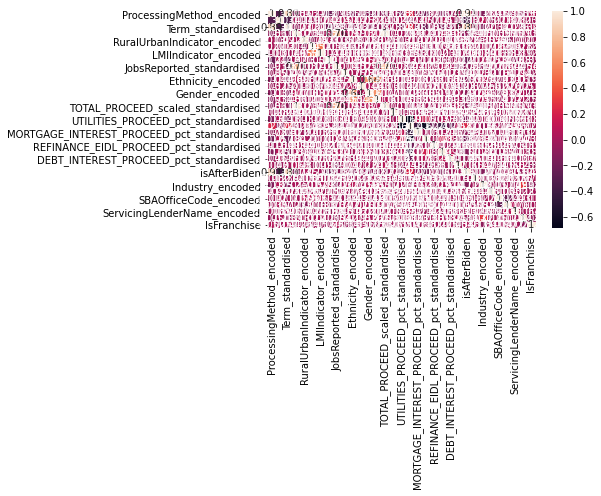

In [57]:
new_df2.corr()
sns.heatmap(new_df2.corr(), annot=True)

- Pairs of variables with high correlation

In [58]:
# Calculate the correlation matrix
correlation_matrix = new_df2.corr()

# Set a threshold for high correlation (e.g., 0.7)
threshold = 0.7

# Find pairs with correlation above the threshold
high_correlation_pairs = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)

# Get the variable pairs with high correlation
high_correlation_variables = []

# Get the variable pairs with high correlation
high_correlation_variables = []

for col in high_correlation_pairs.columns:
    for col2 in high_correlation_pairs.index:
        if high_correlation_pairs.loc[col2, col] and (col2, col) not in high_correlation_variables:
            high_correlation_variables.append((col, col2))

# Print the pairs of highly correlated variables
for pair in high_correlation_variables:
    print(pair,': ', correlation_matrix.loc[pair[0], pair[1]])

('ProcessingMethod_encoded', 'Term_standardised') :  0.8945696747975597
('ProcessingMethod_encoded', 'isAfterBiden') :  0.9051896167767605
('Term_standardised', 'isAfterBiden') :  0.8846085698321428
('CurrentApprovalAmount_scaled_standardised', 'JobsReported_standardised') :  0.7581074301600986
('CurrentApprovalAmount_scaled_standardised', 'TOTAL_PROCEED_scaled_standardised') :  0.9999997373899361
('JobsReported_standardised', 'TOTAL_PROCEED_scaled_standardised') :  0.7581076652449359


## Classification

In [86]:
# Import library to use Decision Trees
from sklearn.tree import DecisionTreeClassifier
# Import library to split data into training and test sets
from sklearn.model_selection import train_test_split
# Import library to measure performance
from sklearn.metrics import accuracy_score


# Get predictor variables X from dataset
#excluded: 'isFraud' from prepped data
columns_to_keep1 = ['ProcessingMethod_encoded', 'LoanStatus_encoded', 'Term_standardised', 'CurrentApprovalAmount_scaled_standardised', 'RuralUrbanIndicator_encoded', 'HubzoneIndicator_encoded', 'LMIIndicator_encoded', 'BusinessAgeDescription_encoded', 'JobsReported_standardised', 'Race_encoded', 'Ethnicity_encoded', 'BusinessType_encoded', 'Gender_encoded', 'Veteran_encoded', 'TOTAL_PROCEED_scaled_standardised', 'PROCEED_Diff_standardised', 'UTILITIES_PROCEED_pct_standardised', 'PAYROLL_PROCEED_pct_standardised', 'MORTGAGE_INTEREST_PROCEED_pct_standardised', 'RENT_PROCEED_pct_standardised', 'REFINANCE_EIDL_PROCEED_pct_standardised', 'HEALTH_CARE_PROCEED_pct_standardised', 'DEBT_INTEREST_PROCEED_pct_standardised', 'PROCEED_Per_Job_scaled_standardised', 'isAfterBiden', 'isDiffBorrowerAndProjectCity', 'Industry_encoded', 'SBAOfficeCode_encoded', 'BorrowerState_encoded', 'ServicingLenderName_encoded', 'Subsector_encoded', 'IsFranchise']
new_df3  = new_df2.drop(['isFraud'], axis=1, inplace=False)
X = new_df2[columns_to_keep1]
# Get target variable y from dataset
y = new_df2['isFraud']
# Create training and test sets, split up into predictor variables and target variables
# with 20% of the dataset to be used for testing.
# "stratify = y" means we maintain proportion of classes in both training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify = y,  random_state = 1)
# Build a Decision Tree model,
# using entropy as the measure for choosing nodes and branches,
# and with a maximum tree depth of 3 (i.e. 3 branches deep)
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 2)
# Give training set for the DT to learn from
dt.fit(X_train, y_train)

# Give the test set to the DT, which returns its predicted answers
y_pred = dt.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

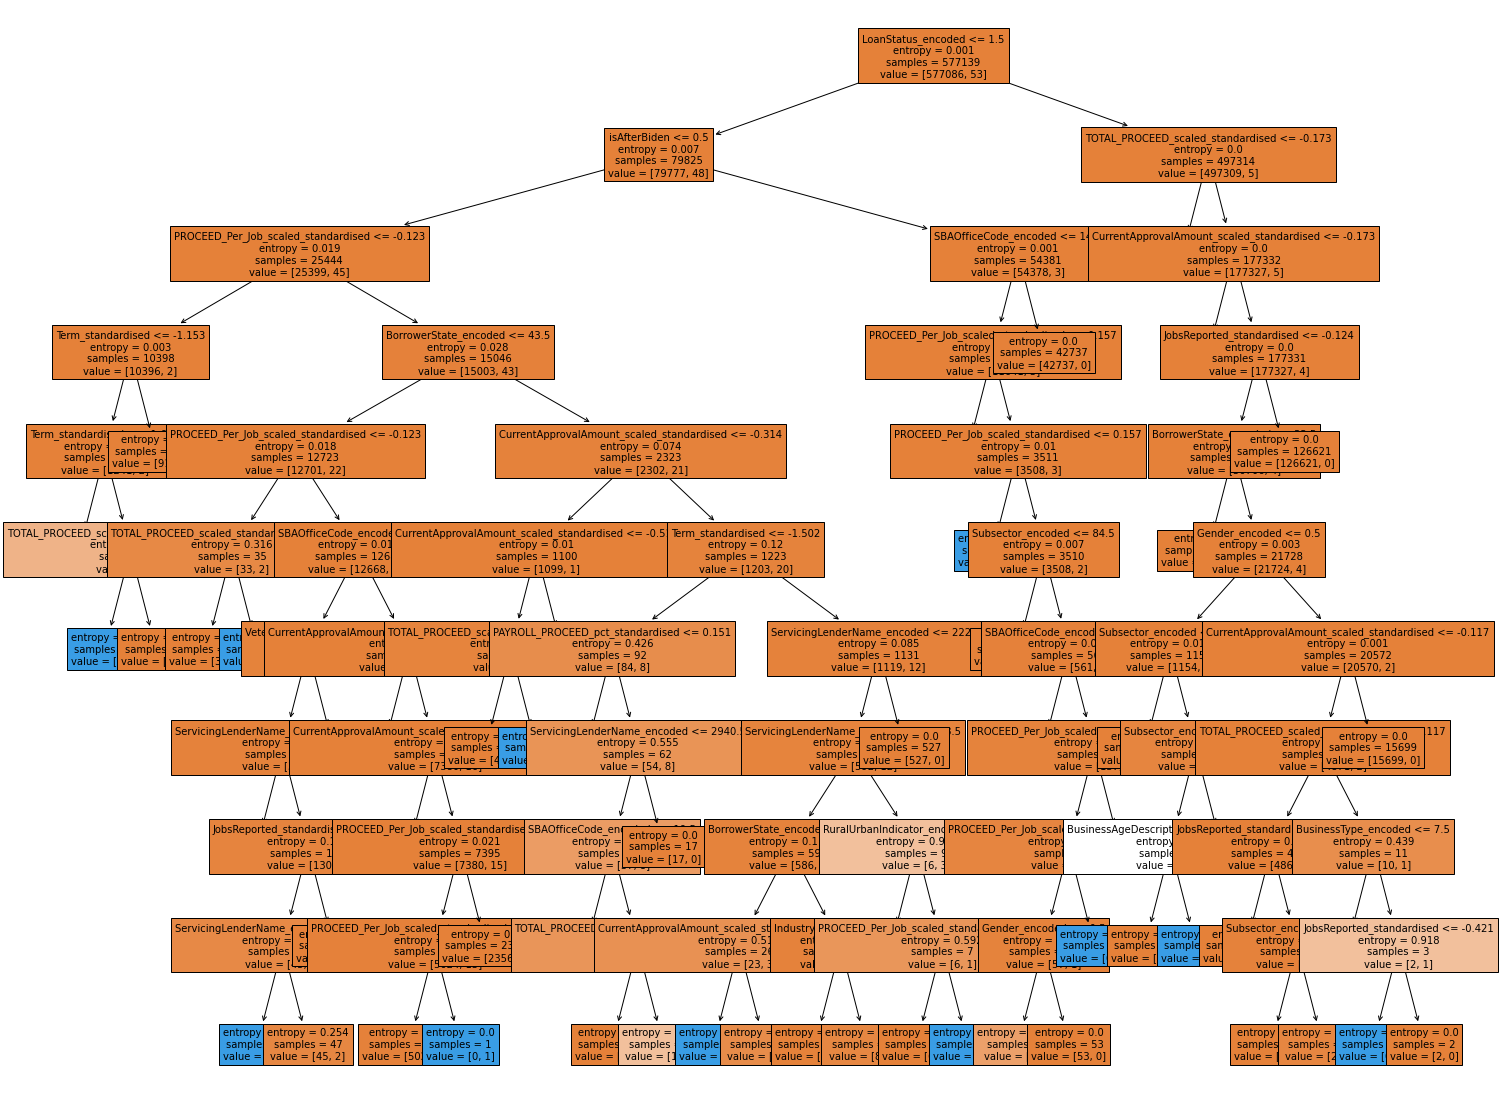

array([0, 1])

In [87]:
# Import libraries to show DT as a plot
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# Generate a plot showing the DT
plt.figure(figsize=(25,20))
plot_tree(dt.fit(X_train,y_train), feature_names = columns_to_keep1, filled = True, fontsize = 10)
plt.show()


# Show all class names
dt.classes_



In [100]:
acc1=[]
generateClassificationReport(y_test,y_pred)
acc1.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    384724
           1       0.10      0.06      0.07        36

    accuracy                           1.00    384760
   macro avg       0.55      0.53      0.54    384760
weighted avg       1.00      1.00      1.00    384760

[[384706     18]
 [    34      2]]
accuracy is  0.9998648508160931


In [103]:
# Show accuracy of labels predicted, rounded to 2 decimal places
accuracy = accuracy_score(y_test, y_pred)
round(accuracy,4)

0.9999

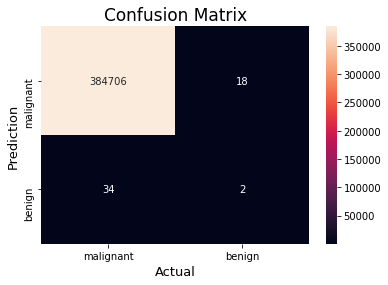

Accuracy   : 0.9998648508160931
Precision : 0.1
Recall    : 0.05555555555555555
F1-score  : 0.07142857142857142


In [104]:
# Import library to show confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

### SMOTE
- Over Sampling: resampling the minority class so that it equals to the majority class.

In [95]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Split the data into features and target
X = new_df2[columns_to_keep1]
y = new_df2['isFraud']

# Create a SMOTE object
smote = SMOTE()

     |████████████████████████████████| 235 kB 851 kB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 502 kB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Apply Over Sampling
print('Before Oversampling')
print(sorted(Counter(y_train).items()))
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
print('After Oversampling')
print(sorted(Counter(y_train).items()))
#Standard Scaler
#scaler = StandardScaler()  
#scaler.fit(X_train)  
#X_train = scaler.transform(X_train)  
#X_test = scaler.transform(X_test)  
#Fitting Model
model = DecisionTreeClassifier()
acc = []
model.fit(X_train, y_train)
target_pred = model.predict(X_test)
generateClassificationReport(y_test,target_pred)
acc.append(accuracy_score(y_test,target_pred))

print("\n Accuracy: ",stat.mean(acc))

Before Oversampling
[(0, 673276), (1, 53)]
After Oversampling
[(0, 673276), (1, 673276)]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    288534
           1       0.08      0.14      0.10        36

    accuracy                           1.00    288570
   macro avg       0.54      0.57      0.55    288570
weighted avg       1.00      1.00      1.00    288570

[[288479     55]
 [    31      5]]
accuracy is  0.999701978722667

 Accuracy:  0.999701978722667


### Performance Report

In [99]:
#Performance Report
def generateClassificationReport(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))    
    print('accuracy is ',accuracy_score(y_test,y_pred))

# Comparision of Results


## Decision Tree Results
- Without SMOTE</br></br>
<img src="Decision Tree Results.png" alt="Decision Tree Results" width="300" height="200">
- With SMOTE</br></br>
<img src="SMOTEDecision Tree Result.png" alt="SMOTE Decision Tree Results" width="300" height="200">